# Petrol consumption prediction using Decision Tree Regression model

Mounted at /content/drive


## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('petrol_consumption.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


##Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Decision Tree Regression model

In [7]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
#Compared Actual y test value with predicted y value

from numpy.core.multiarray import concatenate
#df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

print(y_pred)
print(concatenate(  
    (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1
)
)

[547. 414. 574. 554. 631. 644. 628. 540. 414. 464.]
[[547. 534.]
 [414. 410.]
 [574. 577.]
 [554. 571.]
 [631. 577.]
 [644. 704.]
 [628. 487.]
 [540. 587.]
 [414. 467.]
 [464. 580.]]


In [10]:
from sklearn import metrics
print("Training set score: {:.7f}".format(regressor.score(X_train, y_train)))
print("Test set score: {:.7f}".format(regressor.score(X_test, y_test)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training set score: 1.0000000
Test set score: 0.2259670
Mean Absolute Error: 50.8
Mean Squared Error: 4535.4
Root Mean Squared Error: 67.34537846058926


####We got 100% score on training data.
####On test data we got 2.2% score because we did not provide any tuning parameters while intializing the tree as a result of which algorithm split the training data till the leaf node. Due to which depth of tree increased and our model did the overfitting.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


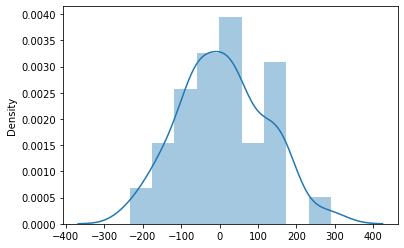

In [20]:
prediction=regressor.predict(X_test)

# checking difference between labled y and predicted y
sns.distplot(y_test-prediction)

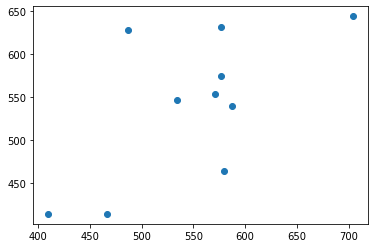

In [33]:
plt.scatter(y_test,y_pred)

# Try with hyperparameter tuning

In [23]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [24]:
from sklearn.model_selection import GridSearchCV

tuning_model = GridSearchCV(regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [25]:
#fit into whole dataset
tuning_model.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-10620.357 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-15521.621 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-13346.812 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-7940.609 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-21388.284 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fra

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fract

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [26]:
# best hyperparameters 
tuning_model.best_params_


{'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [27]:
# best model score
tuning_model.best_score_

-7550.574274494521

##Training Decision Tree With Best Hyperparameters

In [28]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='log2',max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [29]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

In [31]:
# prediction
tuned_pred=tuned_hyper_model.predict(X_test)

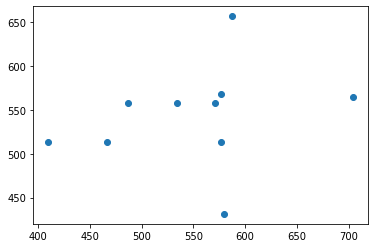

In [32]:
plt.scatter(y_test,tuned_pred)

In [34]:
print("Training set score: {:.7f}".format(tuned_hyper_model.score(X_train, y_train)))
print("Test set score: {:.7f}".format(tuned_hyper_model.score(X_test, y_test)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tuned_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tuned_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

Training set score: 0.7442000
Test set score: -0.1782756
Mean Absolute Error: 68.76
Mean Squared Error: 6904.035000000001
Root Mean Squared Error: 83.09052292530117


#Conclusion
We got 50.8 MAE, 4535.4 MSE, 67.3453 RMSE values with defult model parameters. However, we have tried hyperparameter tuning tchinque to imporve the model accuracy unfortunately, we got less accuracy compared with defualt model accuracy. Thus, defualt model parameter has been given best score for this scenario. If want more accuracy, best option to try with another regression model.   

**Defult paramter :**




*   Mean Absolute Error: 50.8
*   Mean Squared Error: 4535.4
* Root Mean Squared Error: 67.34537846058926



**Hyper parameter tuning:**
* Mean Absolute Error: 68.76
* Mean Squared Error: 6904.035000000001
* Root Mean Squared Error: 83.09052292530117